<a href="https://colab.research.google.com/github/GERSTMAN/experiment2/blob/main/azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

המטרה של העבודה היתה לבחון את ההשערה שחוטי תכלת בציצית נקרעים יותר מהר מחוטי לבן.
לשם כך פירקתי ציצית בלויה בו היה מספר שווה של חוטי תכלת ושל חוטי לבן (כשיטת התוספות הידועה) ואחר כך מדדתי את החוטים.
אמנם, לא מדדתי כל חוט וחוט כשהציצית היתה חדשה, אך האורכים סטנדרטים וניתן לאמת זאת בעת רכישת סט חדש. 120 ס"מ לחוט דק רגיל ו-150 ס"מ לכל שמש (בסט שמיועד לקשירת 13 חוליות לפי שיטת הגר"א).
בחנתי את ההשערה במבחן T (7 דרגות חופש), וכן בחנתי השערות אלטרנטיביות לפיהן מיקום החוט בבגד הוא שמשפיע על הסיכוי של חוט להיקרע.
בסוף, שילבתי עזר גרפי להצגת אורכי החוטים, הממחיש את ההפרש בין גורלם של חוטי התכלת והלבן.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
azure = [['white',150,142,'front','left','yed_21'],
['white',120,103,'front','left','yed_21'],
['blue',120,102,'front','left','yed_21'],
['blue',150,89,'front','left','yed_21'],
['white',120,106,'front','right','yed_21'],
['blue',150,135,'front','right','yed_21'],
['blue',120,72,'front','right','yed_21'],
['white',150,134,'front','right','yed_21'],
['white',150,137,'back','left','yed_21'],
['white',120,109,'back','left','yed_21'],
['blue',150,131,'back','left','yed_21'],
['blue',120,88,'back','left','yed_21'],
['blue',150,98,'back','right','yed_21'],
['white',150,132,'back','right','yed_21'],
['white',120,102,'back','right','yed_21'],
['blue',120,84,'back','right','yed_21']]

In [ ]:
df = pd.DataFrame(azure, columns=['color', 'orig_ln','pres_ln','f/b','r/l','cloth'])

In [ ]:
df

,color,orig_ln,pres_ln,f/b,r/l,cloth
0,white,150,142,front,left,yed_21
1,white,120,103,front,left,yed_21
2,blue,120,102,front,left,yed_21
3,blue,150,89,front,left,yed_21
4,white,120,106,front,right,yed_21
5,blue,150,135,front,right,yed_21
6,blue,120,72,front,right,yed_21
7,white,150,134,front,right,yed_21
8,white,150,137,back,left,yed_21
9,white,120,109,back,left,yed_21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   color    16 non-null     object
 1   orig_ln  16 non-null     int64 
 2   pres_ln  16 non-null     int64 
 3   f/b      16 non-null     object
 4   r/l      16 non-null     object
 5   cloth    16 non-null     object
dtypes: int64(2), object(4)
memory usage: 896.0+ bytes


In [ ]:
df.insert(3, "difference",df['orig_ln']-df['pres_ln'], True)

In [ ]:
df

,color,orig_ln,pres_ln,difference,f/b,r/l,cloth
0,white,150,142,8,front,left,yed_21
1,white,120,103,17,front,left,yed_21
2,blue,120,102,18,front,left,yed_21
3,blue,150,89,61,front,left,yed_21
4,white,120,106,14,front,right,yed_21
5,blue,150,135,15,front,right,yed_21
6,blue,120,72,48,front,right,yed_21
7,white,150,134,16,front,right,yed_21
8,white,150,137,13,back,left,yed_21
9,white,120,109,11,back,left,yed_21


In [ ]:
p_table = pd.pivot_table(df, index = ['f/b', 'r/l','orig_ln','color'],values=['difference'])

In [ ]:
p_table

difference
f/b   r/l   orig_ln color            
back  left  120     blue           32
                    white          11
            150     blue           19
                    white          13
      right 120     blue           36
                    white          18
            150     blue           52
                    white          18
front left  120     blue           18
                    white          17
            150     blue           61
                    white           8
      right 120     blue           48
                    white          14
            150     blue           15
                    white          16

In [ ]:
df1 = df[['color', 'orig_ln','difference','f/b','r/l','cloth']]

In [ ]:
df1

,color,orig_ln,difference,f/b,r/l,cloth
0,white,150,8,front,left,yed_21
1,white,120,17,front,left,yed_21
2,blue,120,18,front,left,yed_21
3,blue,150,61,front,left,yed_21
4,white,120,14,front,right,yed_21
5,blue,150,15,front,right,yed_21
6,blue,120,48,front,right,yed_21
7,white,150,16,front,right,yed_21
8,white,150,13,back,left,yed_21
9,white,120,11,back,left,yed_21


In [ ]:
group_blue = df1[df1['color']=='blue']
group_white = df1[df1['color']=='white']

In [ ]:
group_f = df1[df1['f/b']=='front']
group_b = df1[df1['f/b']=='back']

In [ ]:
group_r = df1[df1['r/l']=='right']
group_l = df1[df1['r/l']=='left']

In [ ]:
group_150 = df1[df1['orig_ln']==150]
group_120 = df1[df1['orig_ln']==120]

In [ ]:
dif_color = ttest_rel(group_blue['difference'], group_white['difference'])

In [ ]:
dif_position_fb = ttest_rel(group_f['difference'], group_b['difference'])

In [ ]:
dif_position_rl = ttest_rel(group_r['difference'], group_l['difference'])

In [ ]:
dif_len = ttest_rel(group_150['difference'], group_120['difference'])

In [ ]:
print('white',' ','blue',' ',dif_color)
print('front',' ','back',' ',dif_position_fb)
print('right',' ','left',' ',dif_position_rl)
print('150',' ','120',' ',dif_len)

white   blue   TtestResult(statistic=3.914522024707396, pvalue=0.00578966336216682, df=7)
front   back   TtestResult(statistic=-0.03094287251686777, pvalue=0.9761788614811876, df=7)
right   left   TtestResult(statistic=0.5376162432255781, pvalue=0.6075017336083551, df=7)
150   120   TtestResult(statistic=0.1103354568734741, pvalue=0.9152400725029919, df=7)


מ.ש.ל
צבע החוט הוא המנבא באופן מובהק את סיכויו של החוט להיקרע, גם כאשר ה-N הוא נמוךץ
אין בכוחם של מי מהמשתנים האחרים להסביר איזה חוט יקרע.

In [ ]:
pivoted = df.pivot(index=['f/b', 'r/l','orig_ln'], columns="color", values="difference")

In [ ]:
pivoted.insert(2, "hefresh",pivoted['blue']-pivoted['white'], True)

In [ ]:
pivoted.mean()

color
blue       35.125
white      14.375
hefresh    20.750
dtype: float64

In [ ]:
pivoted.std()

color
blue       17.274568
white       3.583195
hefresh    18.820581
dtype: float64

In [ ]:
pivoted1 = df.pivot(index=['f/b', 'r/l','orig_ln'], columns="color", values="pres_ln")

In [ ]:
pivoted1

color                blue  white
f/b   r/l   orig_ln             
back  left  120        88    109
            150       131    137
      right 120        84    102
            150        98    132
front left  120       102    103
            150        89    142
      right 120        72    106
            150       135    134

<Axes: xlabel='f/b,r/l,orig_ln'>

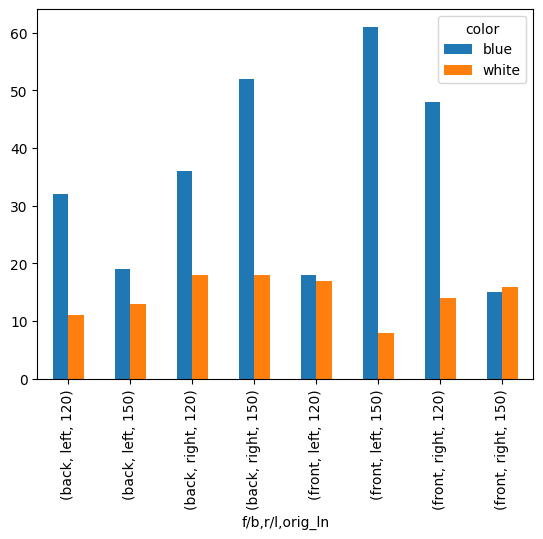

In [ ]:
pivoted.plot.bar(y=['blue','white'])

<Axes: xlabel='f/b,r/l,orig_ln'>

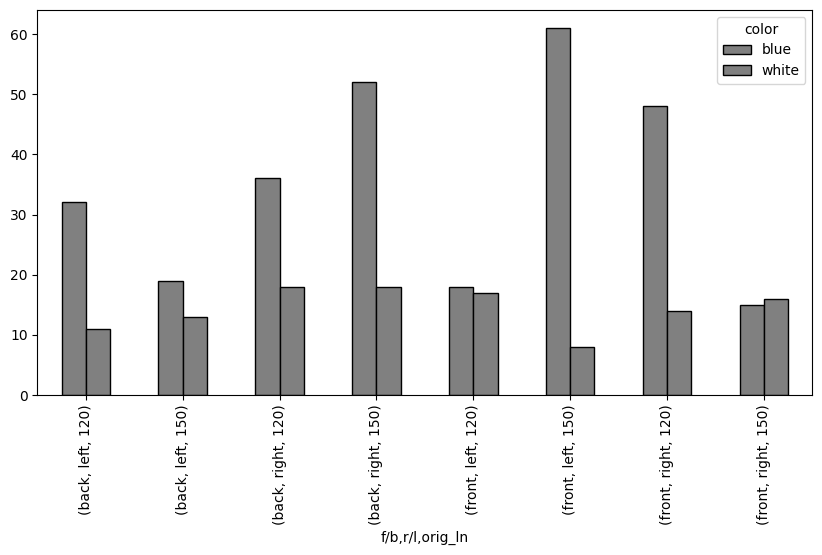

In [ ]:
pivoted.plot.bar(y=['blue','white'],
                 figsize=(10, 5),
                 facecolor='gray',
                 edgecolor='black',
                 linewidth=1,
                 color=['blue', 'white'])
#thanks google bard

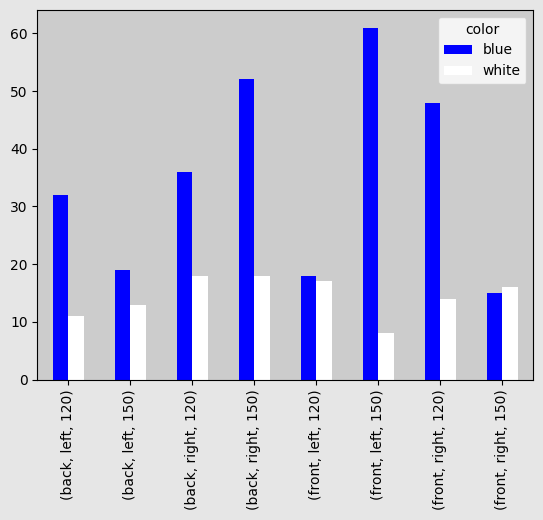

In [ ]:
ax = pivoted.plot.bar(y=['blue', 'white'], color=['blue', 'white'])
ax.set_facecolor((0.8,0.8,0.8))
fig = ax.get_figure()
fig.patch.set_facecolor((0.9,0.9,0.9))
ax.set_xlabel('')
plt.show()
#Thank you chatGPT!

<Axes: xlabel='f/b,r/l,orig_ln'>

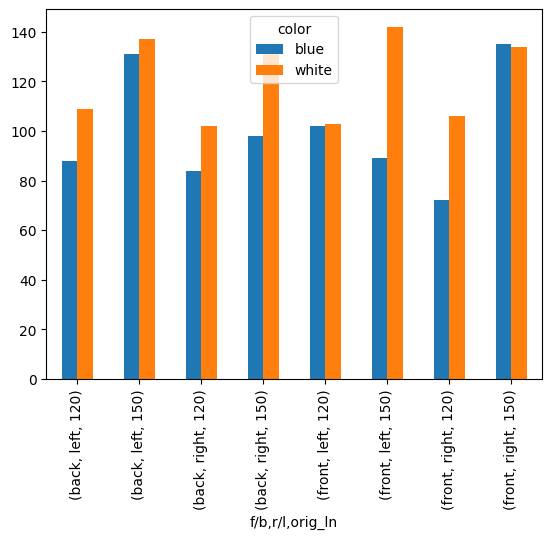

In [ ]:
pivoted1.plot.bar()

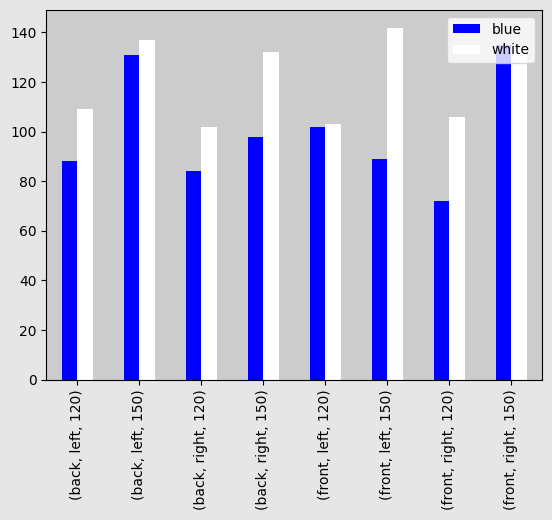

In [ ]:
ax1 = pivoted1.plot.bar(y=['blue', 'white'], color=['blue', 'white'])
ax1.set_facecolor((0.8,0.8,0.8))
fig1 = ax1.get_figure()
fig1.patch.set_facecolor((0.9,0.9,0.9))
ax1.set_xlabel('')
ax1.legend(loc='upper right')
plt.show()

אין כמו מראה עיניים.
ברוך סטרמן - לטיפולך